In [4]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/archive (35).zip", "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
# required libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd

df = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
# read data
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('/content/Sarcasm_Headlines_Dataset.json'))

# convert to pandas dataframe
df = pd.DataFrame(data)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [9]:
df = df[['is_sarcastic', 'headline']]
df.head()

,is_sarcastic,headline
0,0,former versace store clerk sues over secret 'b...
1,0,the 'roseanne' revival catches up to our thorn...
2,1,mom starting to fear son's web series closest ...
3,1,"boehner just wants wife to listen, not come up..."
4,0,j.k. rowling wishes snape happy birthday in th...


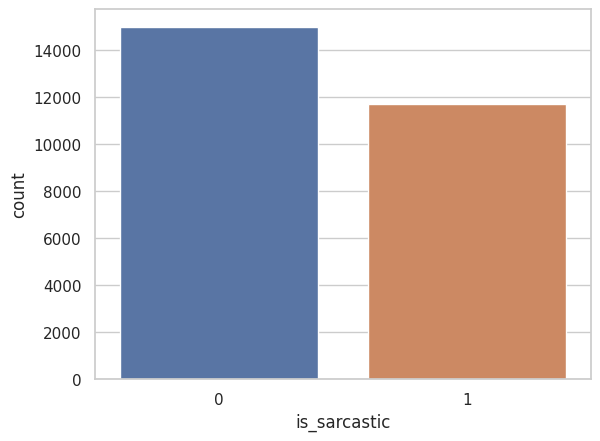

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot(x = 'is_sarcastic', data = df);

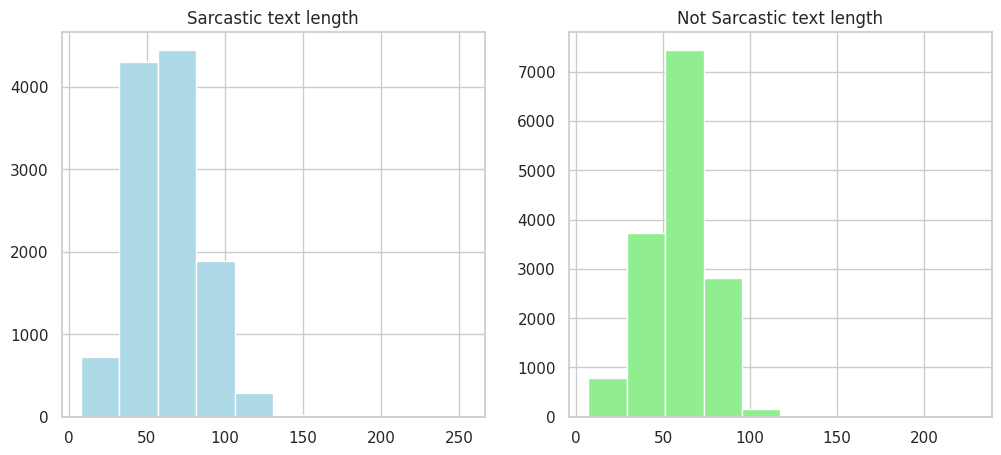

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['is_sarcastic']==1]['headline'].drop_duplicates().apply(len)
ax1.hist(text_len,color='lightblue')
ax1.set_title('Sarcastic text length')
text_len=df[df['is_sarcastic']==0]['headline'].drop_duplicates().apply(len)
ax2.hist(text_len,color='lightgreen')
ax2.set_title('Not Sarcastic text length');

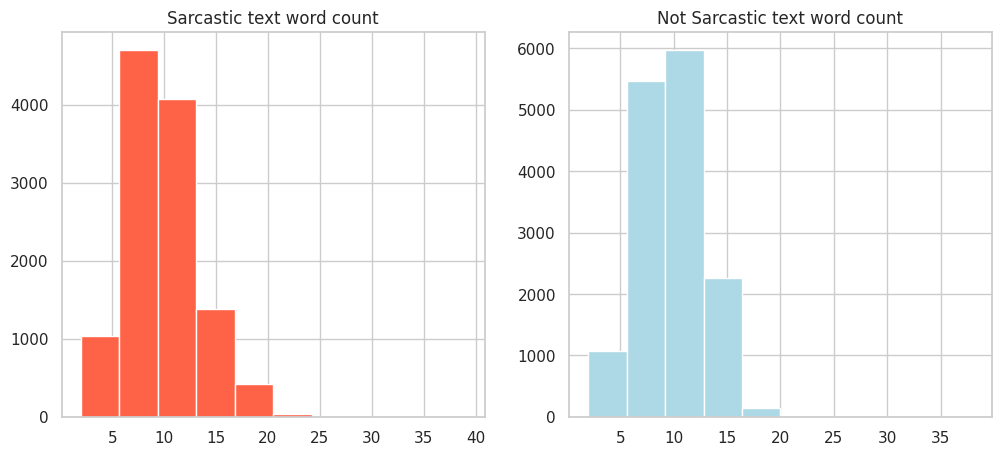

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['is_sarcastic']==1]['headline'].drop_duplicates().str.split().map(lambda x: len(x))
ax1.hist(text_len,color='tomato')
ax1.set_title('Sarcastic text word count')
text_len=df[df['is_sarcastic']==0]['headline'].drop_duplicates().str.split().map(lambda x: len(x))
ax2.hist(text_len,color='lightblue')
ax2.set_title('Not Sarcastic text word count');

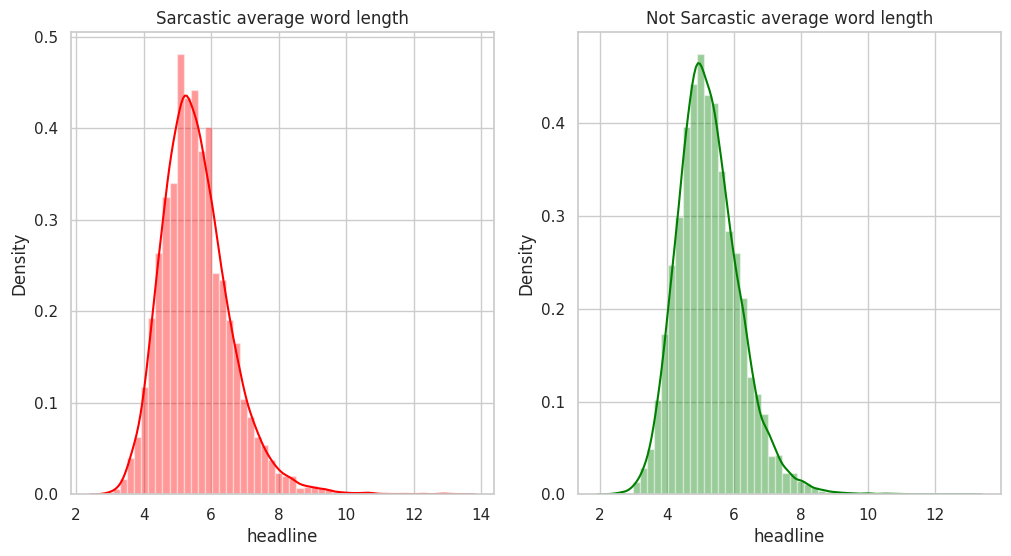

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic average word length')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic average word length');

In [14]:
labels = np.array(df.is_sarcastic)
sentences = np.array(df.headline)
print('Number of sentences and labels: ', len(labels), len(sentences))

Number of sentences and labels:  26709 26709


In [15]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)
print('Train and Test set distribution: ', len(x_train), len(x_test), len(y_train), len(y_test))

Train and Test set distribution:  21367 5342 21367 5342


In [16]:
vocab_size = 10000
max_length = 32
embedding_dim = 32
padding_type='post'
oov_token = '<OOV>'

In [17]:
# tokinizing the texts
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
#print(wored_index)

In [18]:
# pdding
train_sequences = tokenizer.texts_to_sequences(x_train)
padded_train_sequences = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type)

test_sequences = tokenizer.texts_to_sequences(x_test)
padded_test_sentences = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type)

In [24]:
number_of_epochs = 10
lstm1_dim = 64
lstm2_dim = 32
gru_dim = 32
filters = 128
kernel_size = 5
lr = 0.0001

In [25]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 32)            320000    
                                                                 
 dropout (Dropout)           (None, 32, 32)            0         
                                                                 
 conv1d (Conv1D)             (None, 28, 128)           20608     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [26]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    metrics = ['accuracy']
)

In [27]:
# raining
history = model.fit(padded_train_sequences, y_train, epochs = number_of_epochs, validation_data=(padded_test_sentences, y_test), verbose=1)

Epoch 1/10
668/668 [==============================] - 33s 44ms/step - loss: 0.6844 - accuracy: 0.5616 - val_loss: 0.6742 - val_accuracy: 0.5532
Epoch 2/10
668/668 [==============================] - 7s 10ms/step - loss: 0.5405 - accuracy: 0.7327 - val_loss: 0.4315 - val_accuracy: 0.8063
Epoch 3/10
668/668 [==============================] - 5s 8ms/step - loss: 0.3636 - accuracy: 0.8519 - val_loss: 0.3981 - val_accuracy: 0.8207
Epoch 4/10
668/668 [==============================] - 7s 11ms/step - loss: 0.3046 - accuracy: 0.8828 - val_loss: 0.3910 - val_accuracy: 0.8317
Epoch 5/10
668/668 [==============================] - 6s 9ms/step - loss: 0.2612 - accuracy: 0.9030 - val_loss: 0.3905 - val_accuracy: 0.8360
Epoch 6/10
668/668 [==============================] - 5s 7ms/step - loss: 0.2327 - accuracy: 0.9160 - val_loss: 0.3945 - val_accuracy: 0.8351
Epoch 7/10
668/668 [==============================] - 4s 6ms/step - loss: 0.2041 - accuracy: 0.9296 - val_loss: 0.4038 - val_accuracy: 0.8362
Ep

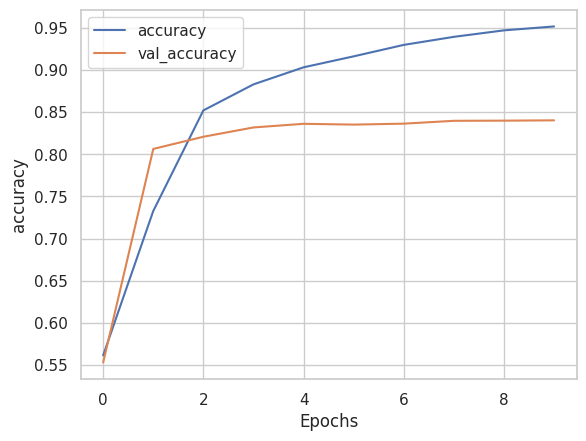

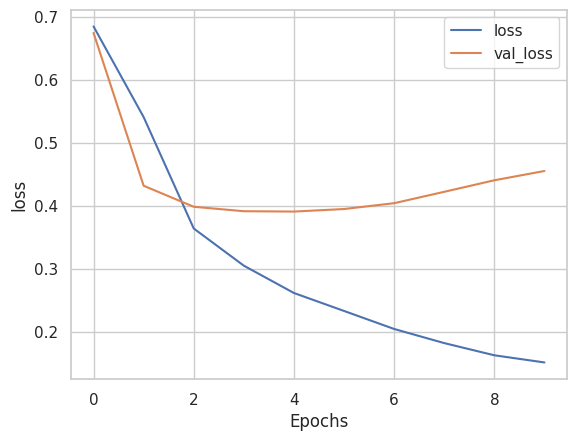

In [33]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [28]:
print('Accuracy on test set: ', model.evaluate(padded_test_sentences,y_test)[1]*100)

167/167 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.8401
Accuracy on test set:  84.01347994804382


In [29]:
preds = model.predict(padded_test_sentences).flatten()
y_predict = []
for i in preds:
    if i < 0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)
y_predict[:5]

167/167 [==============================] - 0s 2ms/step


[1, 1, 1, 0, 1]

In [30]:
print(classification_report(y_test, y_predict, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.87      0.84      0.85      2955
    Sarcastic       0.81      0.84      0.82      2387

     accuracy                           0.84      5342
    macro avg       0.84      0.84      0.84      5342
 weighted avg       0.84      0.84      0.84      5342



In [31]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[2484  471]
 [ 383 2004]]


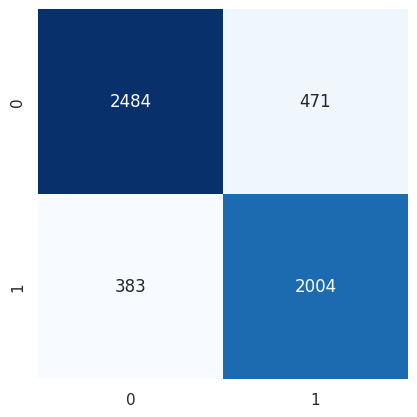

In [32]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False);

In [38]:
import requests
import zipfile
import io

# Download GloVe embeddings
url = "http://nlp.stanford.edu/data/glove.6B.zip"
response = requests.get(url)
compressed_file = io.BytesIO(response.content)
zip_ref = zipfile.ZipFile(compressed_file)
zip_ref.extractall()

# The rest of the code remains the same


In [40]:
# Prepare GloVe embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf-8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 100
embedding_matrix = create_embedding_matrix('glove.6B.100d.txt', tokenizer.word_index, embedding_dim)




In [42]:
#... (previous code remains the same)

vocab_size = len(tokenizer.word_index) + 1  # Update vocab_size

#... (previous code remains the same)

# Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#... (the rest of the code remains the same)


In [49]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    metrics = ['accuracy']
)

In [51]:
# raining
history1 = model1.fit(padded_train_sequences, y_train, epochs = 50, validation_data=(padded_test_sentences, y_test), verbose=1)

Epoch 1/50
668/668 [==============================] - 9s 14ms/step - loss: 0.2600 - accuracy: 0.8918 - val_loss: 0.3305 - val_accuracy: 0.8604
Epoch 2/50
668/668 [==============================] - 10s 15ms/step - loss: 0.2571 - accuracy: 0.8940 - val_loss: 0.3329 - val_accuracy: 0.8626
Epoch 3/50
668/668 [==============================] - 9s 14ms/step - loss: 0.2517 - accuracy: 0.8964 - val_loss: 0.3286 - val_accuracy: 0.8637
Epoch 4/50
668/668 [==============================] - 9s 14ms/step - loss: 0.2513 - accuracy: 0.8956 - val_loss: 0.3281 - val_accuracy: 0.8615
Epoch 5/50
668/668 [==============================] - 10s 15ms/step - loss: 0.2470 - accuracy: 0.8985 - val_loss: 0.3306 - val_accuracy: 0.8568
Epoch 6/50
668/668 [==============================] - 10s 15ms/step - loss: 0.2467 - accuracy: 0.8946 - val_loss: 0.3298 - val_accuracy: 0.8617
Epoch 7/50
668/668 [==============================] - 9s 14ms/step - loss: 0.2435 - accuracy: 0.9010 - val_loss: 0.3244 - val_accuracy: 0.8

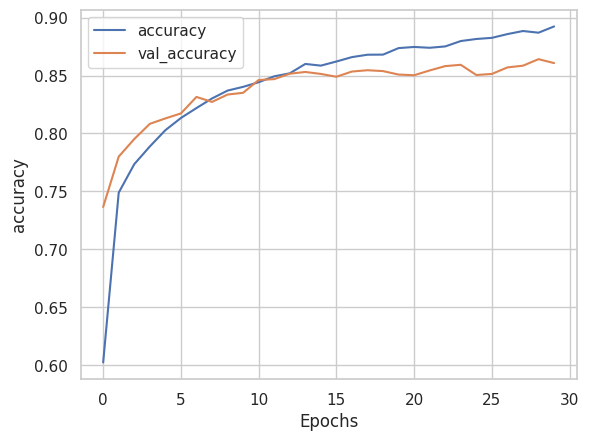

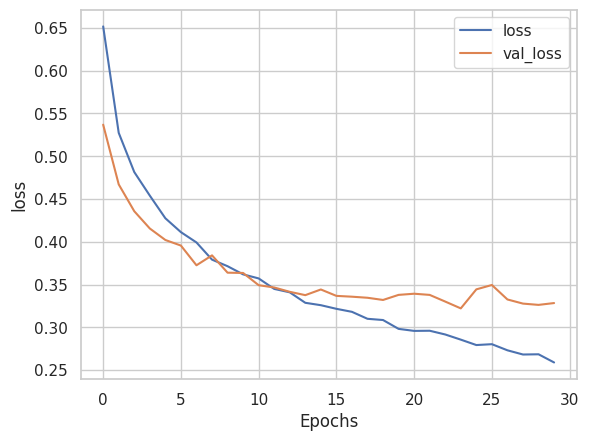

In [53]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

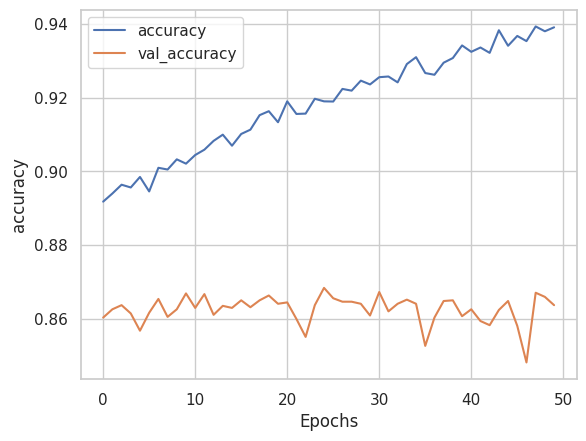

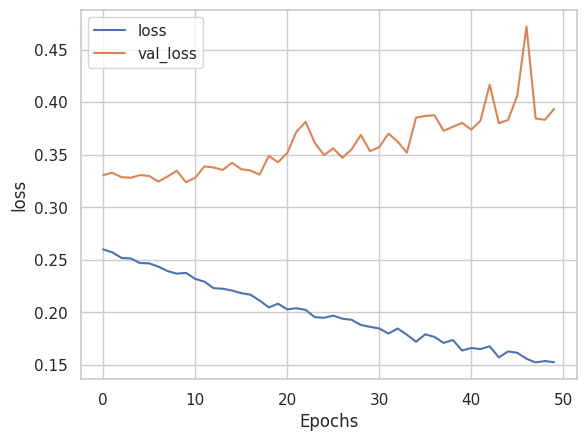

In [52]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

In [68]:
import random

def random_prediction(model, x_test, y_test, tokenizer):
    index = random.randint(0, len(x_test) - 1)
    test_data = x_test[index]

    # Tokenize and pad the test data
    test_sequence = tokenizer.texts_to_sequences([test_data])
    padded_test_sequence = pad_sequences(test_sequence, maxlen=max_length, padding=padding_type)

    # Make a prediction
    prediction = model.predict(padded_test_sequence)
    predicted_label = 1 if prediction >= 0.5 else 0

    print("Test Data: ", test_data)
    print("Actual Label: ", y_test[index])
    print("Predicted Label: ", predicted_label)

# Call the function with your model, x_test, y_test, and tokenizer
random_prediction(model1, x_test, y_test, tokenizer)


1/1 [==============================] - 0s 22ms/step
Test Data:  report: most small businesses fail in first 6 hours of being on fire
Actual Label:  1
Predicted Label:  1


In [ ]:
#... (previous code remains the same)


#... (the rest of the code remains the same)
vocab_size = len(tokenizer.word_index) + 1  # Update vocab_size

#... (previous code remains the same)

# Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [69]:
vocab_size = len(tokenizer.word_index) + 1  # Update vocab_size



In [71]:
# Prepare GloVe embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf-8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_matrix = create_embedding_matrix('glove.6B.200d.txt', tokenizer.word_index, embedding_dim)




In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 200  # Increase embedding dimension size
lstm3_dim = 16  # Add an additional LSTM layer

# Model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm3_dim)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    metrics = ['accuracy']
)

# Set up Early Stopping and Model Checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Training
history2 = model2.fit(padded_train_sequences, y_train, epochs=150, validation_data=(padded_test_sentences, y_test), verbose=1, callbacks=[early_stopping, model_checkpoint])


Epoch 1/150
668/668 [==============================] - 31s 27ms/step - loss: 0.6906 - accuracy: 0.5574 - val_loss: 0.6451 - val_accuracy: 0.6496
Epoch 2/150
668/668 [==============================] - 20s 29ms/step - loss: 0.6132 - accuracy: 0.6622 - val_loss: 0.5280 - val_accuracy: 0.7449
Epoch 3/150
668/668 [==============================] - 14s 21ms/step - loss: 0.5319 - accuracy: 0.7392 - val_loss: 0.4597 - val_accuracy: 0.7872
Epoch 4/150
668/668 [==============================] - 14s 21ms/step - loss: 0.4802 - accuracy: 0.7731 - val_loss: 0.4238 - val_accuracy: 0.8053
Epoch 5/150
668/668 [==============================] - 14s 21ms/step - loss: 0.4465 - accuracy: 0.7975 - val_loss: 0.4118 - val_accuracy: 0.8079
Epoch 6/150
668/668 [==============================] - 18s 27ms/step - loss: 0.4237 - accuracy: 0.8104 - val_loss: 0.4070 - val_accuracy: 0.8091
Epoch 7/150
668/668 [==============================] - 14s 21ms/step - loss: 0.4006 - accuracy: 0.8221 - val_loss: 0.3810 - val_ac

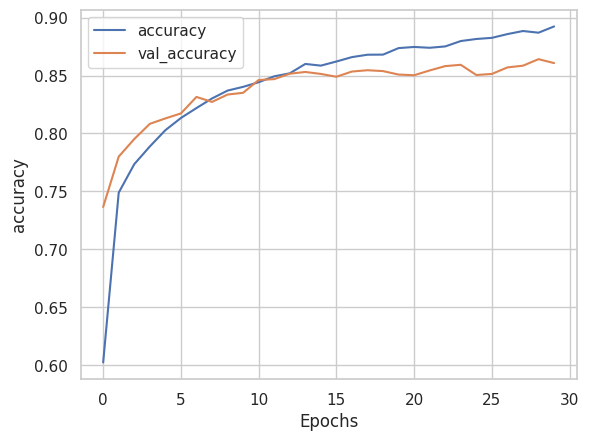

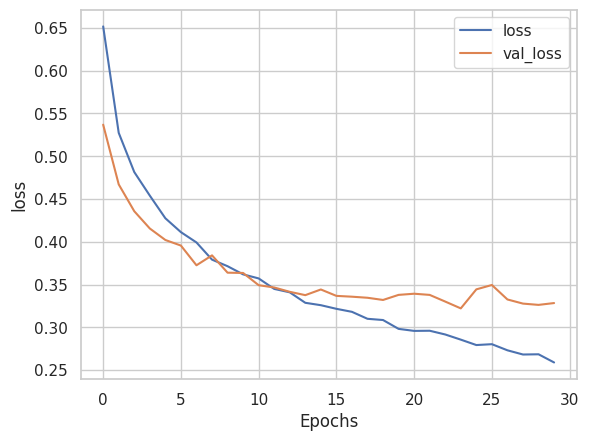

In [73]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [74]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')
test_loss, test_accuracy = best_model.evaluate(padded_test_sentences, y_test)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))


167/167 [==============================] - 4s 7ms/step - loss: 0.3435 - accuracy: 0.8525
Test accuracy: 85.25%


In [79]:
import random

def random_prediction(model, x_test, y_test, tokenizer):
    index = random.randint(0, len(x_test) - 1)
    test_data = x_test[index]

    # Tokenize and pad the test data
    test_sequence = tokenizer.texts_to_sequences([test_data])
    padded_test_sequence = pad_sequences(test_sequence, maxlen=max_length, padding=padding_type)

    # Make a prediction
    prediction = model.predict(padded_test_sequence)
    predicted_label = 1 if prediction >= 0.5 else 0

    print("Test Data: ", test_data)
    print("Actual Label: ", y_test[index])
    print("Predicted Label: ", predicted_label)

# Call the function with your model, x_test, y_test, and tokenizer
random_prediction(best_model, x_test, y_test, tokenizer)


1/1 [==============================] - 0s 22ms/step
Test Data:  test-driven teacher evaluations strike out
Actual Label:  0
Predicted Label:  1
